In [53]:
# Importing the Libraries.
import numpy as np
import pandas as pd 
import seaborn as sns 
import datetime 
import pickle
import matplotlib.pyplot as plt 
import os

import datetime 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import os 
import seaborn as sns 
import shap
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [2]:
# Show plot in jupyter notebook 
%matplotlib inline
#Set the plot style 
sns.set(color_codes= True)
pd.set_option('display.max_columns',100)

In [3]:
#Dataset Location Folder
#Change the dataset location as per your machine setting.
Data_dir = os.path.join("..","assignment_05")
training_data = os.path.join(Data_dir,"ml_case_training_data.csv")
history_data = os.path.join(Data_dir,"ml_case_training_hist_data.csv")
churn_data = os.path.join(Data_dir,"ml_case_training_output.csv")

## Load the Data into a data frame using pandas

In [4]:
train_df = pd.read_csv(training_data)
hist_df  = pd.read_csv(history_data)
churn_df = pd.read_csv(churn_data)
#Perform the merge operation in order to form the training dataset. 
train_data_df = pd.merge(train_df,churn_df,on = 'id')

## General Statistics of the Data Frame

In [6]:
print(pd.DataFrame({"Data_Type":train_data_df.dtypes}))
train_data_df.describe()

                         Data_Type
id                          object
activity_new                object
campaign_disc_ele          float64
channel_sales               object
cons_12m                     int64
cons_gas_12m                 int64
cons_last_month              int64
date_activ                  object
date_end                    object
date_first_activ            object
date_modif_prod             object
date_renewal                object
forecast_base_bill_ele     float64
forecast_base_bill_year    float64
forecast_bill_12m          float64
forecast_cons              float64
forecast_cons_12m          float64
forecast_cons_year           int64
forecast_discount_energy   float64
forecast_meter_rent_12m    float64
forecast_price_energy_p1   float64
forecast_price_energy_p2   float64
forecast_price_pow_p1      float64
has_gas                     object
imp_cons                   float64
margin_gross_pow_ele       float64
margin_net_pow_ele         float64
nb_prod_act         

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


## Missing Values

In [7]:
pd.DataFrame({"Missing_values(%)": train_data_df.isnull().sum()/len(train_data_df.index)*100})

,Missing_values(%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


## Data Visualization

In [8]:
churn_data = train_data_df[['id','churn']]
churn_data.columns = ['companies','churn']

In [9]:
# This is a function created by the BCG team as a part of their Virtual Internship Experience Programe. 
# Using the function as a helper function to plot the stacked bar plot.

def plot_stacked_bars(data_frame,title_,size_=(18,10),rot_ = 0,legend = 'upper right'):
    """
    Plot the stacked bars with annotations 
    
    """
    ax = data_frame.plot(kind = 'bar',stacked = True,figsize= size_,rot= rot_,title=title_)
    
    annotated_stacked_bar(ax,textsize = 14)
    plt.legend(['Retention','Churn'],loc=legend)
    plt.ylabel('Company_base(%)')
    plt.show()
    
def annotated_stacked_bar(ax,pad=0.99,color = 'white',textsize=13):
    
    for p in ax.patches :
        value = str(round(p.get_height(),1))
        if value == '0.0' :
            continue 
        ax.annotate(value,((p.get_x()+p.get_width()/2)*pad-0.05,(p.get_y()+p.get_height()/2)*pad),color=color,
                    size=textsize)       

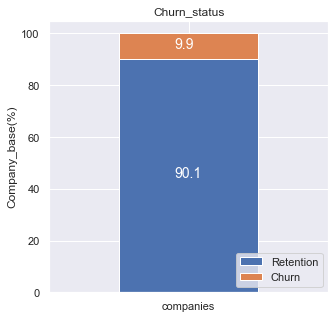

In [10]:
churn_total = churn_data.groupby(churn_data['churn']).count()
churn_percentage = churn_total/churn_total.sum()*100
churn_percentage.transpose()
plot_stacked_bars(churn_percentage.transpose(),"Churn_status",(5,5),0,'lower right')

## SME Activity 

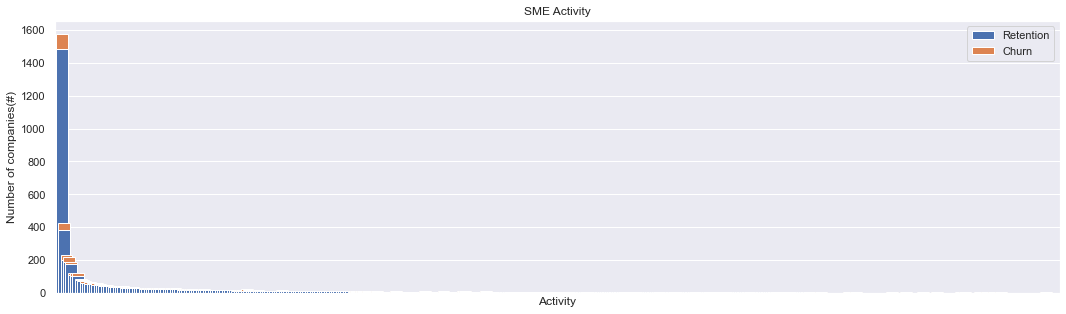

In [11]:
## Visualizing the number of companies on the y-axis and the Activity on the x-axis.
activity = train_data_df[['id','activity_new','churn']]
activity = activity.groupby([activity['activity_new'],activity['churn']])['id'].count().unstack(level = 1).sort_values(by = [0],ascending = False)
activity.plot(kind = 'bar',figsize=(18,5),width=5,stacked = True,title = "SME Activity")

plt.ylabel('Number of companies(#)')
plt.xlabel('Activity')
plt.legend(['Retention','Churn'],loc = 'upper right')
plt.xticks([])
plt.show()

## Filling missing values

In [12]:
activity_total = activity.fillna(0)[0] + activity.fillna(0)[1]
activity_percentage = activity.fillna(0)[1] / activity_total *100

pd.DataFrame({"Percentage_churn":activity_percentage,
              "Total_companies":activity_total}).sort_values(ascending=False,by='Percentage_churn').head(10)

,Percentage_churn,Total_companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


C:\Users\khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khans\anaconda3\lib\si

<AxesSubplot:xlabel='imp_cons'>

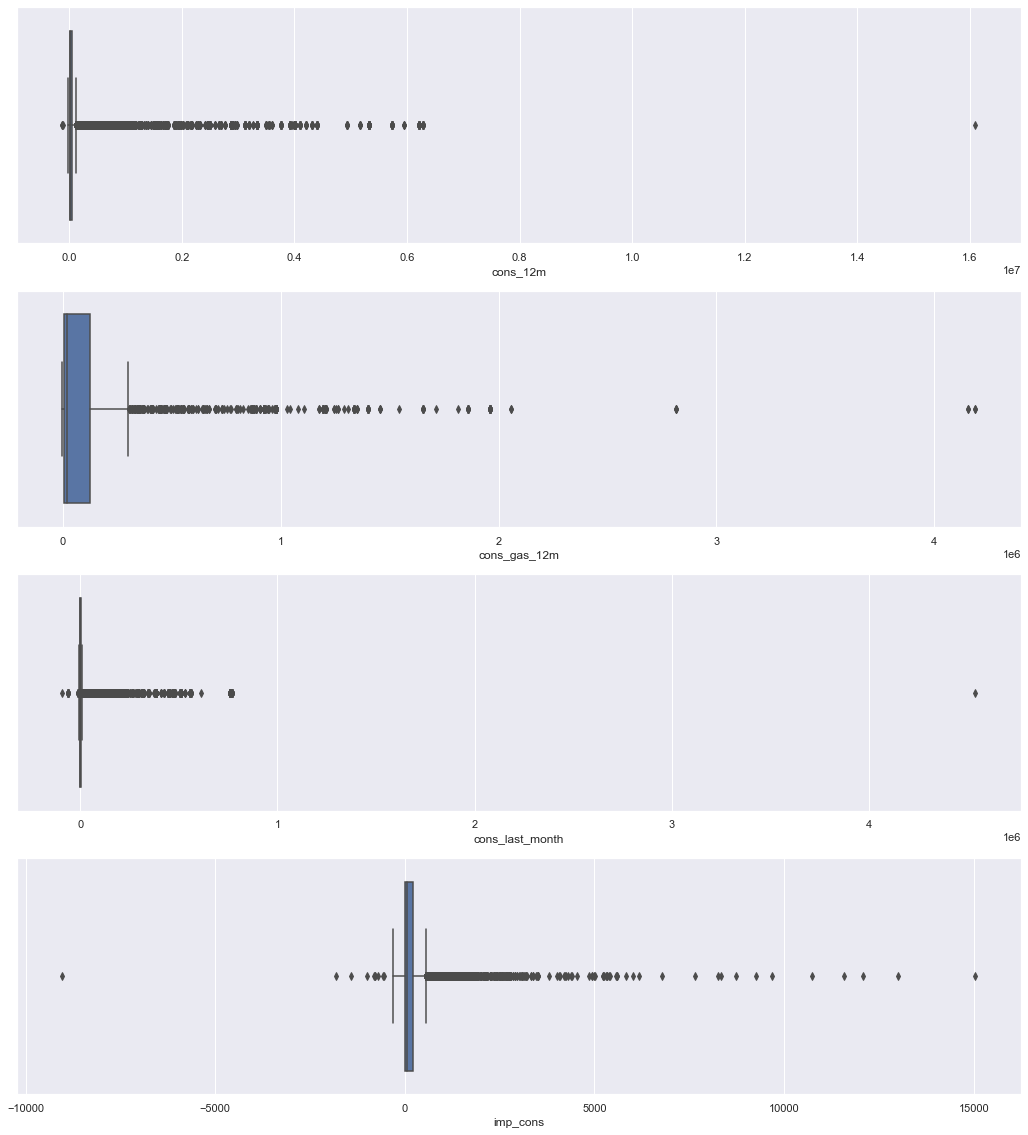

In [13]:
#Plot histograms
fig , axs = plt.subplots(nrows = 4,figsize=(18,20))
consumption_df = train_data_df[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]
sns.boxplot(consumption_df['cons_12m'],ax=axs[0])
sns.boxplot(consumption_df[consumption_df["has_gas"] =='t']['cons_gas_12m'],ax=axs[1])
sns.boxplot(consumption_df['cons_last_month'],ax=axs[2])
sns.boxplot(consumption_df['imp_cons'],ax=axs[3])

## Margins 

C:\Users\khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='margin_gross_pow_ele'>

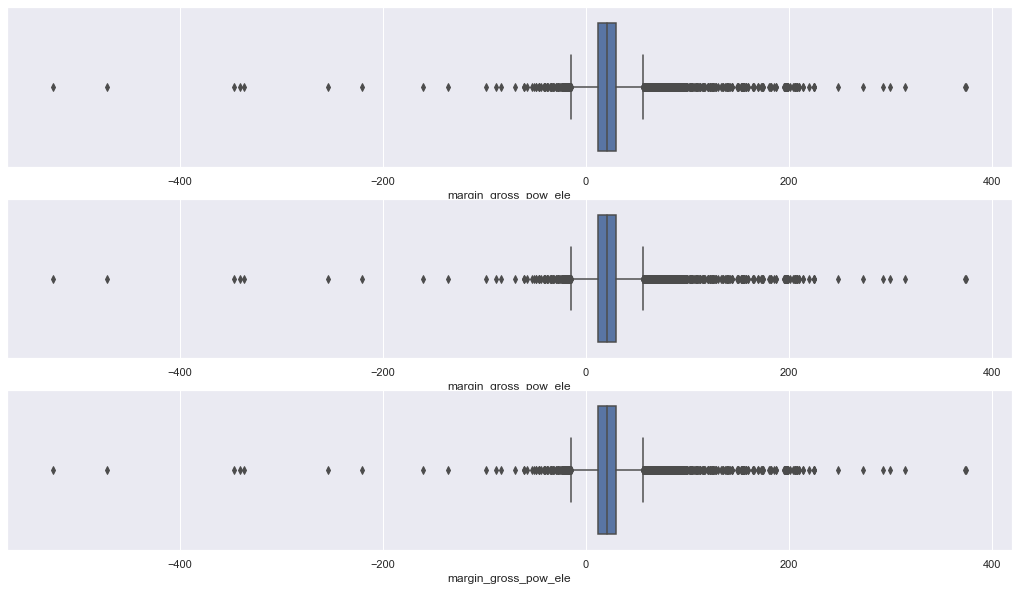

In [14]:
margin_df = train_data_df[['id','margin_gross_pow_ele','margin_net_pow_ele','net_margin']]
fig , axs = plt.subplots(nrows = 3,figsize = (18,10))

#Plot the box plot 
sns.boxplot(margin_df['margin_gross_pow_ele'],ax = axs[0])
sns.boxplot(margin_df['margin_gross_pow_ele'],ax = axs[1])
sns.boxplot(margin_df['margin_gross_pow_ele'],ax = axs[2])

## Data Cleaning

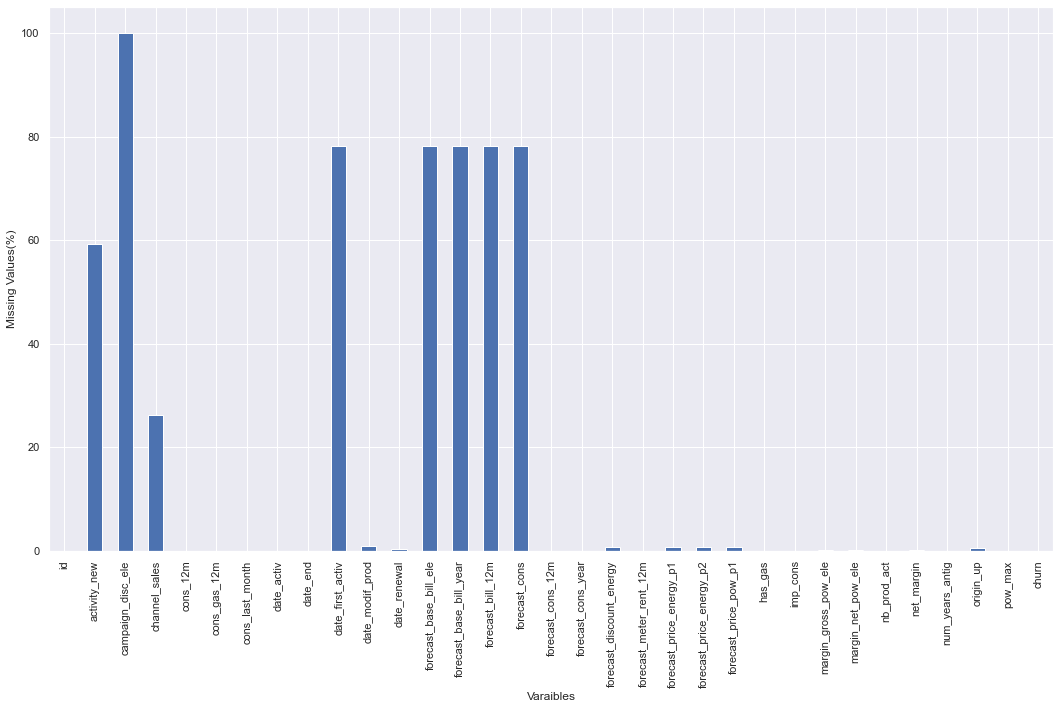

In [15]:
# Find the Missing data and fill the value with either the mean or median.
(train_data_df.isnull().sum()/len(train_data_df.index)*100).plot(kind='bar',figsize=(18,10))
plt.xlabel("Varaibles")
plt.ylabel("Missing Values(%)")
plt.show()

In [16]:
# For simplicity remove the variables with more than 60% of the value missing. 
# We might re-use some of those variables if our model is not good enough.
train_data_df.drop(columns=["campaign_disc_ele","date_first_activ","forecast_base_bill_ele","forecast_base_bill_year",
                            "forecast_bill_12m","forecast_cons"],inplace =True)                      

## Duplicates 

In [17]:
## Making sure the dataset does not contain any duplicate values. 
train_data_df[train_data_df.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


## Formatting the Data

In [18]:
train_data_df.head(9)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,0
6,149d57cf92fc41cf94415803a877cb4b,NaN,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
7,1aa498825382410b098937d65c4ec26d,NaN,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
8,7ab4bf4878d8f7661dfc20e9b8e18011,sscfoipxikopfskekuobeuxkxmwsuucb,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1


In [19]:
## Formatting the date datatype of the train_data_df[column_name].
train_data_df.loc[train_data_df["date_modif_prod"].isnull(),"date_modif_prod"] = train_data_df["date_modif_prod"].value_counts().index[0]
train_data_df.loc[train_data_df["date_end"].isnull(),"date_end"] = train_data_df["date_end"].value_counts().index[0]
train_data_df.loc[train_data_df["date_renewal"].isnull(),"date_renewal"] = train_data_df["date_renewal"].value_counts().index[0]

## Missing Prices values

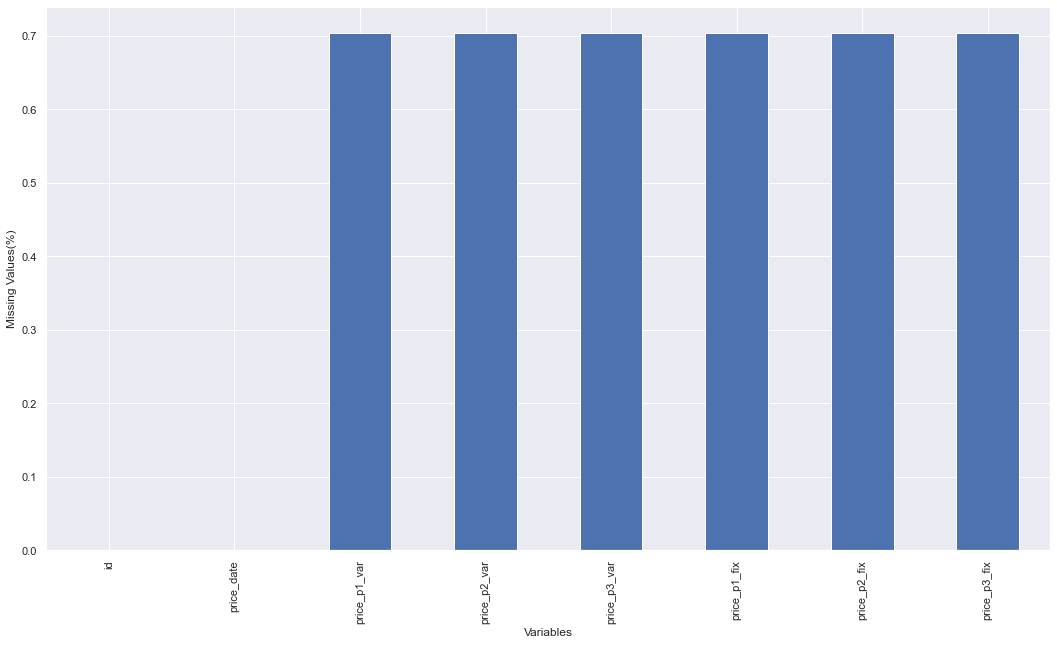

In [20]:
## Visualizing the missing values.
missing_data_percentage = hist_df.isnull().sum()/len(hist_df.index)*100
missing_data_percentage.plot(kind='bar',figsize=(18,10))
plt.xlabel('Variables')
plt.ylabel('Missing Values(%)')
plt.show()

In [21]:
#Checking the Null vaulues of the 'hist_df' along axis = 1.
hist_df[hist_df.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Replace the null values from the 'hist_df[column_name]' with the median value of the 'hist_df[column_name]'. 
hist_df.loc[hist_df['price_p1_var'].isnull(),'price_p1_var'] = hist_df['price_p1_var'].median()
hist_df.loc[hist_df['price_p2_var'].isnull(),'price_p2_var'] = hist_df['price_p2_var'].median()
hist_df.loc[hist_df['price_p3_var'].isnull(),'price_p3_var'] = hist_df['price_p3_var'].median()
hist_df.loc[hist_df['price_p1_fix'].isnull(),'price_p1_fix'] = hist_df['price_p1_fix'].median()
hist_df.loc[hist_df['price_p2_fix'].isnull(),'price_p2_fix'] = hist_df['price_p1_fix'].median()
hist_df.loc[hist_df['price_p3_fix'].isnull(),'price_p3_fix'] = hist_df['price_p1_fix'].median()

## Formatting Dates(train data)

In [23]:
# Transfrom date columns to datetime type. 
train_data_df['date_activ']       = pd.to_datetime(train_data_df['date_activ'],format='%Y-%m-%d')
train_data_df['date_end']         = pd.to_datetime(train_data_df['date_end'],format ='%Y-%m-%d')
train_data_df['date_modif_prod']  = pd.to_datetime(train_data_df['date_modif_prod'],format = '%Y-%m-%d')
train_data_df['date_renewal']     = pd.to_datetime(train_data_df['date_renewal'],format = '%Y-%m-%d')

## Formating Dates (History Data)

C:\Users\khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khans\anaconda3\lib\si

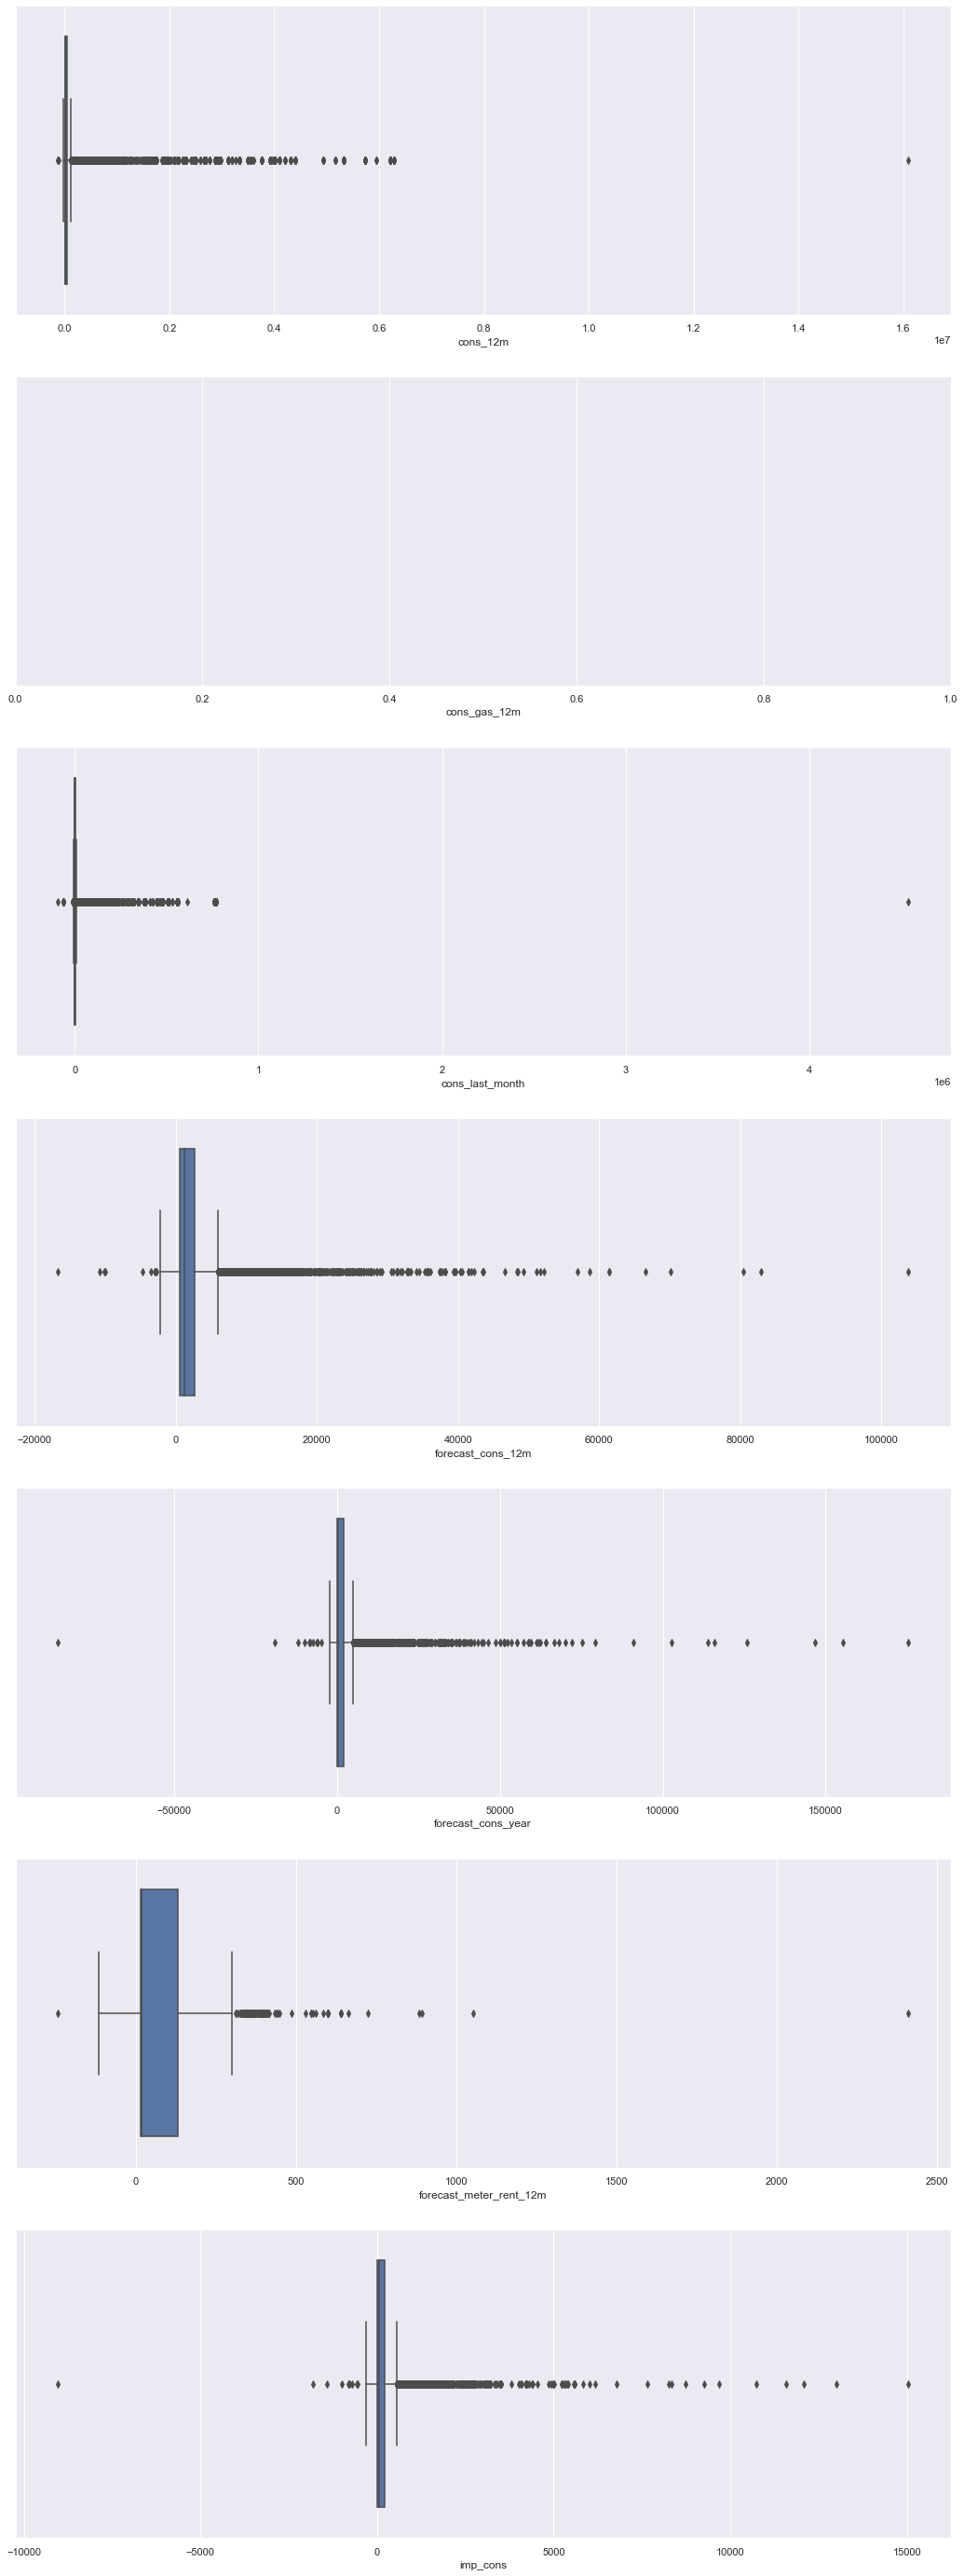

In [24]:
hist_df['price_date'] = pd.to_datetime(hist_df['price_date'],format = '%Y-%m-%d')
fig ,axs = plt.subplots(nrows = 7,figsize=(18,50))

#Plot the boxplots in order to detect the outliers in the dataset.
sns.boxplot((train_data_df['cons_12m'].dropna()), ax = axs[0])
sns.boxplot((train_data_df[train_data_df['has_gas']==1]['cons_gas_12m'].dropna()),ax = axs[1])
sns.boxplot((train_data_df['cons_last_month'].dropna()), ax = axs[2])
sns.boxplot((train_data_df['forecast_cons_12m'].dropna()), ax = axs[3])
sns.boxplot((train_data_df['forecast_cons_year'].dropna()), ax = axs[4])
sns.boxplot((train_data_df['forecast_meter_rent_12m'].dropna()), ax = axs[5])
sns.boxplot((train_data_df['imp_cons'].dropna()), ax = axs[6])
plt.show()

## Negative Data

In [25]:
#Data statistics.
train_data_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [26]:
#Detecting the negative values of the 'price_p1_fix' column.
hist_df[(hist_df.price_p1_fix < 0) | (hist_df.price_p2_fix < 0) | (hist_df.price_p3_fix < 0 ) ]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [27]:
# Replacing the negative data with the median value of the particular feature column. 
hist_df.loc[hist_df['price_p1_fix'] < 0 ,'price_p1_fix'] = hist_df['price_p1_fix'].median()
hist_df.loc[hist_df['price_p2_fix'] < 0 ,'price_p2_fix'] = hist_df['price_p2_fix'].median()
hist_df.loc[hist_df['price_p3_fix'] < 0 ,'price_p3_fix'] = hist_df['price_p3_fix'].median()

In [28]:
hist_df = pd.merge(hist_df,churn_df,on = 'id')

In [29]:
#Splitting the hist_df based on the churn values '1' and '0'.
label_1 = hist_df.loc[hist_df['churn'] == 1,:]
label_0 = hist_df.loc[hist_df['churn'] == 0,:]

In [48]:
def density_pltter(df,col_name,plt_title):
    ax = sns.distplot((df[col_name].dropna()))
    ax.set_xlabel(col_name)

    plt.title(plt_title)
    plt.tight_layout()
    plt.show()  

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


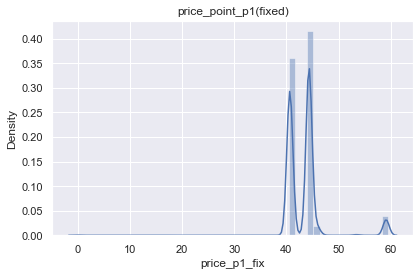

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


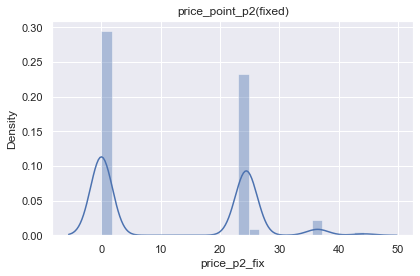

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


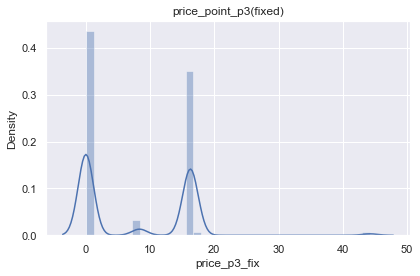

In [49]:
density_pltter(label_1,'price_p1_fix','price_point_p1(fixed)')
density_pltter(label_1,'price_p2_fix','price_point_p2(fixed)')
density_pltter(label_1,'price_p3_fix','price_point_p3(fixed)')

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


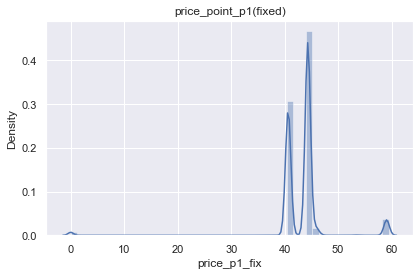

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


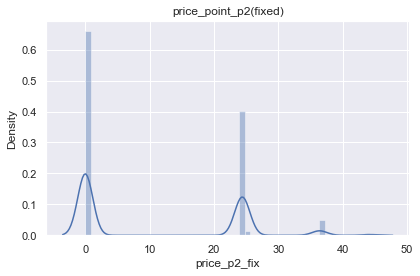

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


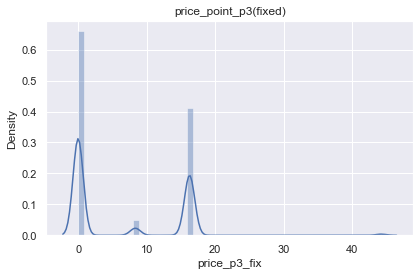

In [50]:
density_pltter(label_0,'price_p1_fix','price_point_p1(fixed)')
density_pltter(label_0,'price_p2_fix','price_point_p2(fixed)')
density_pltter(label_0,'price_p3_fix','price_point_p3(fixed)')

## Feature Engineering 

In [33]:
mean_year = hist_df.groupby(['id']).mean().reset_index()
mean_6m = hist_df[hist_df['price_date'] > "2015-06-01"].groupby(['id']).mean().reset_index()
mean_3m = hist_df[hist_df['price_date'] > "2015-10-01"].groupby(['id']).mean().reset_index()
mean_year = mean_year.rename(index = str,columns={'price_p1_var':'mean_year_price_p1_var',
                                                  'price_p2_var':'mean_year_price_p2_var',
                                                  'price_p3_var':'mean_year_price_p3_var',
                                                  'price_p1_fix':'mean_year_price_p1_fix',
                                                  'price_p2_fix':'mean_year_price_p2_fix',
                                                  'price_p3_fix':'mean_year_price_p3_fix',})
mean_year['mean_year_price_p1'] = mean_year['mean_year_price_p1_var']+ mean_year['mean_year_price_p1_fix']
mean_year['mean_year_price_p2'] = mean_year['mean_year_price_p2_var']+ mean_year['mean_year_price_p2_fix']
mean_year['mean_year_price_p3'] = mean_year['mean_year_price_p3_var']+ mean_year['mean_year_price_p3_fix']
mean_6m = mean_6m.rename(index = str,columns ={"price_p1_var": "mean_6m_price_p1_var",
                                             "price_p2_var": "mean_6m_price_p2_var",
                                             "price_p3_var": "mean_6m_price_p3_var",
                                             "price_p1_fix": "mean_6m_price_p1_fix",
                                             "price_p2_fix": "mean_6m_price_p2_fix",
                                             "price_p3_fix": "mean_6m_price_p3_fix",})
mean_6m['mean_6m_price_p1'] = mean_6m['mean_6m_price_p1_var'] + mean_6m['mean_6m_price_p1_fix']
mean_6m['mean_6m_price_p2'] = mean_6m['mean_6m_price_p2_var'] + mean_6m['mean_6m_price_p2_fix']
mean_6m['mean_6m_price_p3'] = mean_6m['mean_6m_price_p3_var'] + mean_6m['mean_6m_price_p3_fix']
mean_3m = mean_3m.rename(index = str,columns ={"price_p1_var" : "mean_3m_price_p1_var",
                                               "price_p2_var" : "mean_3m_price_p2_var",
                                               "price_p3_var" : "mean_3m_price_p3_var",
                                               "price_p1_fix":  "mean_3m_price_p1_fix",
                                               "price_p2_fix":  "mean_3m_price_p2_fix",
                                               "price_p3_fix":  "mean_3m_price_p3_fix",})
mean_3m['mean_3m_price_p1'] = mean_3m['mean_3m_price_p1_var'] + mean_3m['mean_3m_price_p1_fix']
mean_3m['mean_3m_price_p2'] = mean_3m['mean_3m_price_p2_var'] + mean_3m['mean_3m_price_p2_fix']
mean_3m['mean_3m_price_p3'] = mean_3m['mean_3m_price_p3_var'] + mean_3m['mean_3m_price_p3_fix']
features = mean_year

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


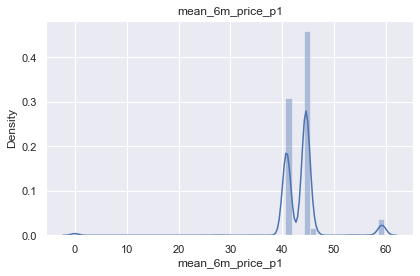

In [51]:
density_pltter(mean_6m,'mean_6m_price_p1','mean_6m_price_p1')
density_pltter(mean_6m,'mean_6m_price_p2','mean_6m_price_p2')
density_pltter(mean_6m,'mean_6m_price_p3','mean_6m_price_p3')

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


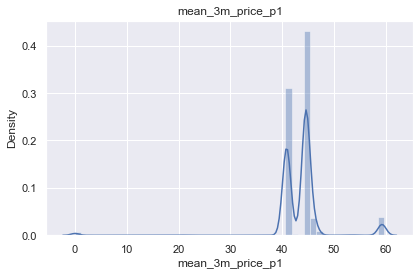

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


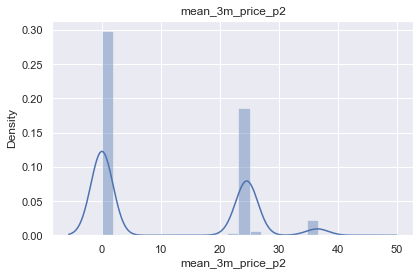

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


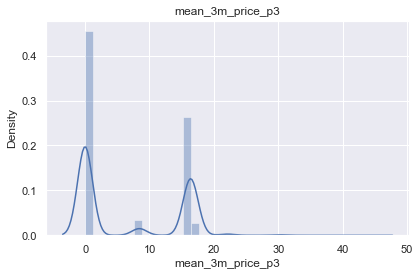

In [52]:
density_pltter(mean_3m,'mean_3m_price_p1','mean_3m_price_p1')
density_pltter(mean_3m,'mean_3m_price_p2','mean_3m_price_p2')
density_pltter(mean_3m,'mean_3m_price_p3','mean_3m_price_p3')

<AxesSubplot:>

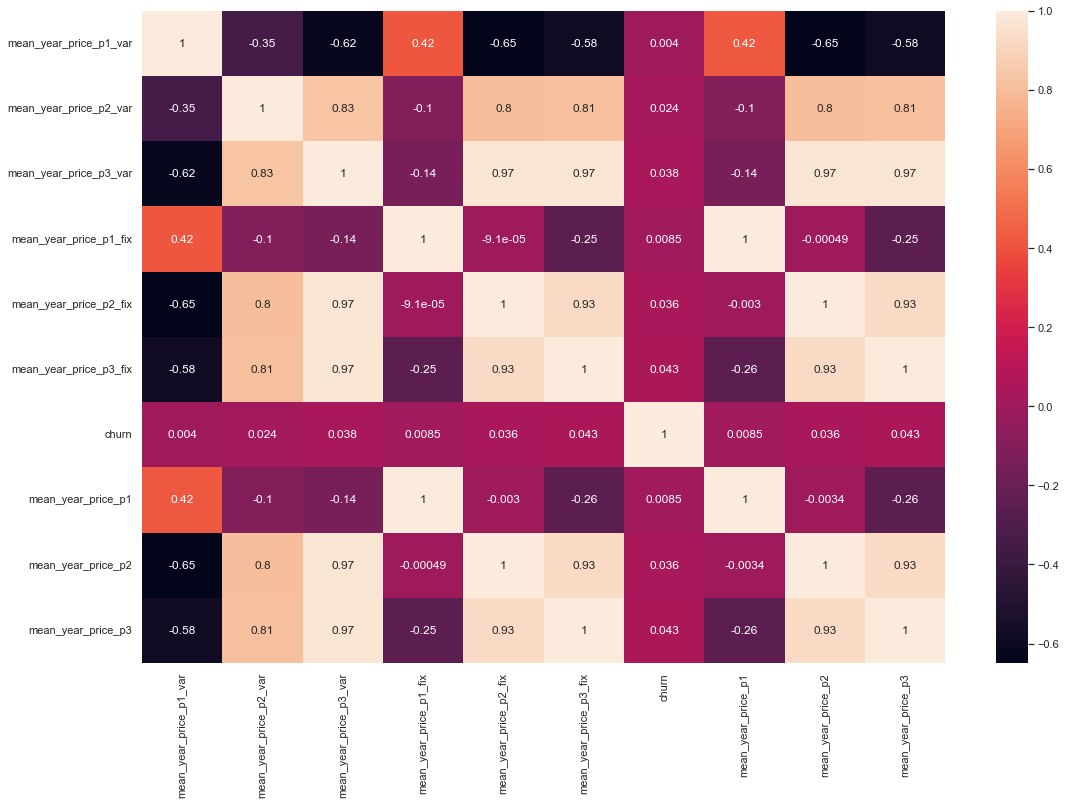

In [34]:
plt.subplots(figsize=(18,12))
sns.heatmap(features.corr(),annot = True)

## Remove the Date Column

In [35]:
train_data_df.drop(columns =["date_activ","date_end","date_modif_prod","date_renewal"],inplace = True)

## Transform the boolean Data

In [36]:
train_data_df['has_gas'] = train_data_df['has_gas'].replace(['t','f'],[1,0])

## Categorical and Dummy Variable 

In [38]:
train_data_df['channel_sales'] = train_data_df['channel_sales'].fillna('null_values_channel')
train_data_df['channel_sales'] = train_data_df['channel_sales'].astype('category')
pd.DataFrame({"Samples in category":train_data_df['channel_sales'].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


<AxesSubplot:>

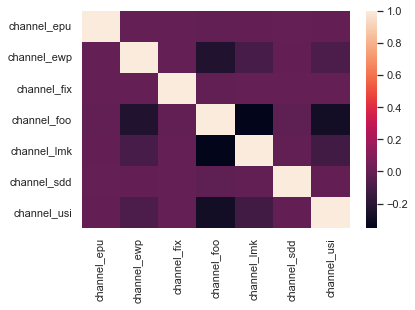

In [39]:
categories_channel_df = pd.get_dummies(train_data_df["channel_sales"],prefix='channel')
categories_channel_df.columns = [col_name[:11] for col_name in categories_channel_df.columns]
categories_channel_df.drop(columns='channel_nul',inplace = True)
sns.heatmap(categories_channel_df.corr())

## Categorical Data Origin Up

In [40]:
train_data_df['origin_up'] = train_data_df['origin_up'].fillna("null_values_origin")
train_data_df['origin_up'] = train_data_df['origin_up'].astype('category')
pd.DataFrame({"Categorical value count": train_data_df['origin_up'].value_counts()})
categories_origin = pd.get_dummies(train_data_df['origin_up'],prefix="origin")
categories_origin.columns = [col_name[:11] for col_name in categories_origin]
categories_origin.drop(columns="origin_null",inplace = True)
train_data_df['activity_new'] = train_data_df['activity_new'].fillna("null_values_activity")
categories_activity = pd.DataFrame({"Activity samples":train_data_df["activity_new"].value_counts()}) 
# Get the categories with less than 75 samples  
to_replace = list(categories_activity[categories_activity["Activity samples"] <= 75].index)
# Replace them with 'null_values_categories'
train_data_df['activity_new'] = train_data_df['activity_new'].replace(to_replace,"null_values_activity")

# create the dummy variables 
categories_activity = pd.get_dummies(train_data_df['activity_new'],prefix = 'activity')
#Rename the columns for simplicity 
categories_activity.columns = [col_name[:11] for col_name in categories_activity.columns]
categories_activity.drop(columns ='activity_nu',inplace = True)

## Merge Dummy Variables to main Data frame

In [41]:
train_data_df = pd.merge(train_data_df,categories_channel_df,left_index = True,right_index = True)
train_data_df = pd.merge(train_data_df,categories_origin,left_index = True, right_index = True)
train_data_df = pd.merge(train_data_df,categories_activity,left_index = True, right_index = True)

## Log Transformation 

In [43]:
# Remove negative values 
train_data_df.loc[train_data_df['cons_12m'] < 0, "cons_12m"]                               = np.nan
train_data_df.loc[train_data_df['cons_gas_12m'] < 0, "cons_gas_12m"]                       = np.nan
train_data_df.loc[train_data_df['cons_last_month'] < 0, "cons_last_month"]                 = np.nan
train_data_df.loc[train_data_df['forecast_cons_12m'] < 0, "forecast_cons_12m"]             = np.nan
train_data_df.loc[train_data_df['forecast_cons_year'] < 0, "forecast_cons_year"]           = np.nan
train_data_df.loc[train_data_df['forecast_meter_rent_12m'] < 0, "forecast_meter_rent_12m"] = np.nan
train_data_df.loc[train_data_df['forecast_price_pow_p1'] < 0, "forecast_price_pow_p1"]     = np.nan
train_data_df.loc[train_data_df['imp_cons'] < 0, "imp_cons"]                               = np.nan

In [44]:
# Applying the log10 transformation 
train_data_df['cons_12m']                 = np.log10(train_data_df['cons_12m'] +1)
train_data_df['cons_gas_12m']             = np.log10(train_data_df['cons_gas_12m'] +1)
train_data_df['cons_last_month']          = np.log10(train_data_df['cons_last_month'] +1)
train_data_df['forecast_cons_12m']        = np.log10(train_data_df['forecast_cons_12m'] +1)
train_data_df['forecast_cons_year']       = np.log10(train_data_df['forecast_cons_year'] +1)
train_data_df['forecast_meter_rent_12m']  = np.log10(train_data_df['forecast_meter_rent_12m'] +1)
train_data_df['forecast_price_pow_p1']    = np.log10(train_data_df['forecast_price_pow_p1'] +1)
train_data_df['imp_cons']                 = np.log10(train_data_df['imp_cons'] +1)

C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

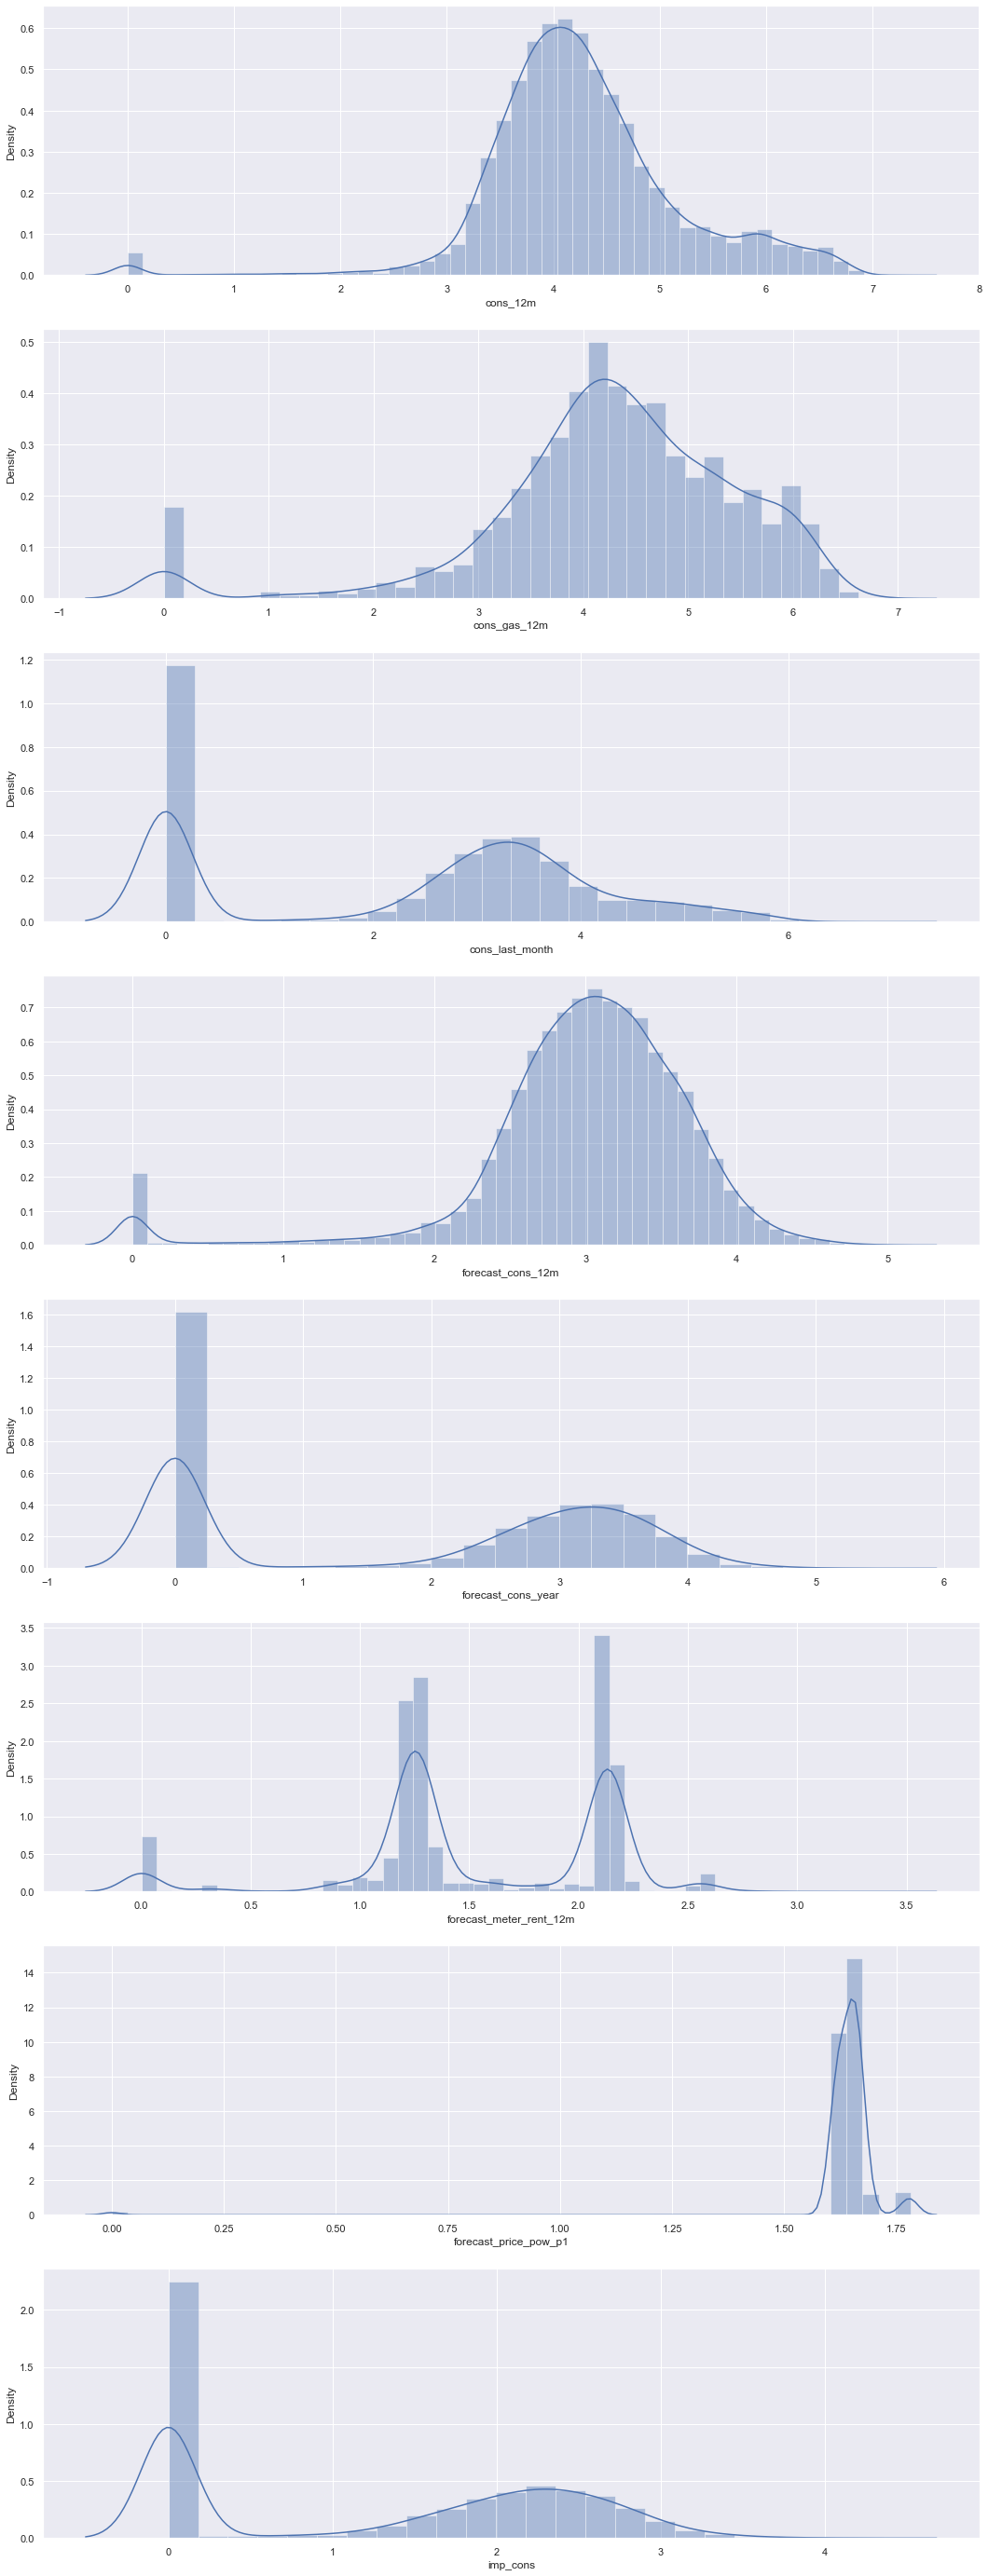

In [46]:
fig , axs = plt.subplots(nrows = 8,figsize=(18,50))
#Plot histograms 
sns.distplot((train_data_df['cons_12m'].dropna()),ax=axs[0])
sns.distplot((train_data_df[train_data_df['has_gas']==1]['cons_gas_12m'].dropna()),ax=axs[1])
sns.distplot((train_data_df['cons_last_month'].dropna()),ax=axs[2])
sns.distplot((train_data_df['forecast_cons_12m'].dropna()),ax=axs[3])
sns.distplot((train_data_df['forecast_cons_year'].dropna()),ax=axs[4])
sns.distplot((train_data_df['forecast_meter_rent_12m'].dropna()),ax=axs[5])
sns.distplot((train_data_df['forecast_price_pow_p1'].dropna()),ax=axs[6])
sns.distplot((train_data_df['imp_cons'].dropna()),ax=axs[7])
plt.show()

## Splitting the Data

In [60]:
y = train_data_df['churn']
x = train_data_df.drop(labels = ['churn','id','activity_new','channel_sales','origin_up'],axis = 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=18)

## Model Developement

In [62]:
model = xgb.XGBClassifier(learning_rate = 0.1 , max_depth =6,n_estimators=500,n_jobs=-1)
result = model.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
y_predict = model.predict(X_test)

In [66]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      3609
           1       0.63      0.09      0.16       415

    accuracy                           0.90      4024
   macro avg       0.77      0.54      0.55      4024
weighted avg       0.88      0.90      0.87      4024



In [ ]:
####################################*******************************************################################################